In [ ]:
# Importing the standard modules
import json
import sys
import urllib.request
import zipfile
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Input, Layer, LayerNormalization, Dropout, RepeatVector, Conv2D, Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.sequence import pad_sequences

## For UCM Dataset

In [ ]:
!git clone https://github.com/thatbrguy/Dropbox-Uploader.git

Cloning into 'Dropbox-Uploader'...
remote: Enumerating objects: 951, done.
remote: Total 951 (delta 0), reused 0 (delta 0), pack-reused 951
Receiving objects: 100% (951/951), 309.19 KiB | 2.58 MiB/s, done.
Resolving deltas: 100% (505/505), done.


In [ ]:
cd Dropbox-Uploader

/content/Dropbox-Uploader


In [ ]:
!chmod +x dropbox_uploader.sh

In [ ]:
!bash dropbox_uploader.sh


 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader55092024912985)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt



In [ ]:
!echo 'gVDnPKpS51AAAAAAAAAARdrFnYJw8ZSHXeVcJbFcFrNeMK_4MkzG8ZC4wl9NE7jw' > token.txt

In [ ]:
!bash dropbox_uploader.sh download UCMerced-Segementation-Caption.zip

 > Downloading "/UCMerced-Segementation-Caption.zip" to "/content/Dropbox-Uploader/UCMerced-Segementation-Caption.zip"... DONE


In [ ]:
# Unpacking the file to get the data we need to work with
file_path = '/content/Dropbox-Uploader/UCMerced-Segementation-Caption.zip'
zipfile.ZipFile(file=file_path, mode="r").extractall('/content/')

In [ ]:
file = open('/content/UCMerced_LandUse/Caption-dataset.json')
data = json.load(file)
file.close()
type(data)

dict

In [ ]:
print(data.keys())
data['dataset']

dict_keys(['images', 'dataset'])


'UCM'

In [ ]:
len(data['images'])

2100

In [ ]:
data['images'][0].keys()

dict_keys(['sentids', 'imgid', 'sentences', 'split', 'filename'])

In [ ]:
for key in data['images'][0].keys():
  print(key, type(data['images'][0][key]))

sentids <class 'list'>
imgid <class 'int'>
sentences <class 'list'>
split <class 'str'>
filename <class 'str'>


In [ ]:
print(data['images'][190]['filename'])
print(data['images'][190]['split'])
print(data['images'][190]['sentids'])
print(data['images'][190]['imgid'])
print(data['images'][190]['sentences'][2]['raw'])

191.tif
test
[950, 951, 952, 953, 954]
190
Four airplanes are stopped dispersedly at the airport .


In [ ]:
splitting = []
num_train = 0
num_val = 0
num_test = 0
for i in range(len(data['images'])):
  split = data['images'][i]['split']
  if split=='train':
    splitting.append(2)
    num_train+=1
  elif split=='val':
    splitting.append(1)
    num_val+=1
  else:
    splitting.append(0)
    num_test+=1

In [ ]:
print(num_train, num_val, num_test)
print(splitting)

1680 210 210
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
all_captions_initial = []
for image in data['images']:
  sentences_image = []
  for sentence in image['sentences']:
    sentences_image.append(sentence['raw'])
  all_captions_initial.append(sentences_image)
print(len(all_captions_initial))
print(all_captions_initial[96])

2100
['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']


In [ ]:
!ls /content/UCMerced_LandUse/Images

agricultural	 denseresidential  mediumresidential  sparseresidential
airplane	 forest		   mobilehomepark     storagetanks
baseballdiamond  freeway	   overpass	      tenniscourt
beach		 golfcourse	   parkinglot
buildings	 harbor		   river
chaparral	 intersection	   runway


In [ ]:
all_strings = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
common_string = 'agricultural'
all_filenames = []
for common_string in all_strings:
  for i in range(100):
    if i<10:
      num_string = '0' + str(i)
    else:
      num_string = str(i)
    name = common_string + '/' + common_string + num_string + '.tif'
    all_filenames.append(name)

In [ ]:
temp_dir_path = '/content/UCMerced_LandUse/Images'
file_path = os.path.join(temp_dir_path, all_filenames[798])
print(file_path)

/content/UCMerced_LandUse/Images/forest/forest98.tif


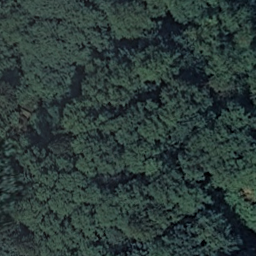

In [ ]:
img = Image.open(file_path)
img

In [ ]:
# Checking if all files exist

dir_path = '/content/UCMerced_LandUse/Images'
idx = []
for i, name in enumerate(all_filenames):
  # Each filename will be joined to the dir_path to create a path for each image
  # This will then be used to open that file and work with it
  file_path = os.path.join(dir_path, name)
  img = Image.open(file_path)
  if i%500 == 0:
    print(i, end = ' ')
  if i%10000==0:
    print()

0 
500 1000 1500 2000 

In [ ]:
filenames_train = []
all_captions_train = []
filenames_val = []
captions_val = []
filenames_test = []
captions_test = []
for i, split in enumerate(splitting):
  if split==2:
    filenames_train.append(all_filenames[i])
    all_captions_train.append(all_captions_initial[i])
  elif split==1:
    filenames_val.append(all_filenames[i])
    captions_val.append(all_captions_initial[i])
  else:
    filenames_test.append(all_filenames[i])
    captions_test.append(all_captions_initial[i])

print(len(filenames_train), len(filenames_val), len(filenames_test))

1680 210 210


In [ ]:
filenames = []
all_captions = []
for i, filename in enumerate(filenames_train):
  for caption in all_captions_train[i]:
    filenames.append(filename)
    all_captions.append(caption)

print(len(filenames))

8400


## For RSICD Dataset

In [ ]:
!git clone https://github.com/thatbrguy/Dropbox-Uploader.git

Cloning into 'Dropbox-Uploader'...
remote: Enumerating objects: 951, done.
remote: Total 951 (delta 0), reused 0 (delta 0), pack-reused 951
Receiving objects: 100% (951/951), 327.52 KiB | 9.63 MiB/s, done.
Resolving deltas: 100% (504/504), done.


In [ ]:
cd Dropbox-Uploader

/content/Dropbox-Uploader


In [ ]:
!chmod +x dropbox_uploader.sh

In [ ]:
!bash dropbox_uploader.sh


 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader210422113025839)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt



In [ ]:
!echo 'gVDnPKpS51AAAAAAAAAARdrFnYJw8ZSHXeVcJbFcFrNeMK_4MkzG8ZC4wl9NE7jw' > token.txt

In [ ]:
# !bash dropbox_uploader.sh download RSICD_images.zip
!bash dropbox_uploader.sh download dataset_rsicd.json

 > Downloading "/dataset_rsicd.json" to "/content/Dropbox-Uploader/dataset_rsicd.json"... DONE


In [ ]:
# Unpacking the file to get the data we need to work with
file_path = '/content/Dropbox-Uploader/RSICD_images.zip'
zipfile.ZipFile(file=file_path, mode="r").extractall('/content/')

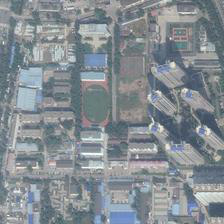

In [ ]:
dir_path = "/content/RSICD_images"
file_path = os.path.join(dir_path, '00001.jpg')
img = Image.open(file_path)
img

In [ ]:
file = open('/content/Dropbox-Uploader/dataset_rsicd.json')
data = json.load(file)
file.close()
type(data)

dict

In [ ]:
all_filenames = []
all_captions_initial = []
for image in data['images']:
  all_filenames.append(image['filename'])
  captions = []
  for sentence in image['sentences']:
    captions.append(sentence['raw'])
  all_captions_initial.append(captions)

In [ ]:
filenames_train, filenames_val, all_captions_train, captions_val = train_test_split(all_filenames, all_captions_initial, test_size = 0.2, random_state = 101)

In [ ]:
filenames = []
all_captions = []
for i, filename in enumerate(filenames_train):
  for caption in all_captions_train[i]:
    filenames.append(filename)
    all_captions.append(caption)

In [ ]:
len(filenames), len(all_captions), len(filenames_val), len(captions_val)

(43680, 43680, 2185, 2185)

## For COCO Dataset

In [ ]:
# I had downloaded the captions file on my google drive so i am taking th data from there
# Put captions_val2017.json instead to load the captons of validation set
file = open('drive/My Drive/Colab Notebooks/Project/Image Captioning/Dataset/annotations/captions_train2017.json')
raw_data = json.load(file)
file.close()

In [ ]:
# To see all the keys in the raw data
raw_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [ ]:
# Extracting the images list from the records. Each element of the images list is a dictionary containing its id and filename
# Filename will later be used to retrieve the image from the train2017 folder
records = {}
images = raw_data['images']
images[0].keys()

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])

In [ ]:
# storing the filename to its respective id
for image in images:
  records[image['id']] = {}
  records[image['id']]['filename'] = image['file_name']
  records[image['id']]['captions'] = []

In [ ]:
# Annotations is also a list of dictionaries each containing an ikmage_id and its caption
annotations = raw_data['annotations']
annotations[0].keys()

dict_keys(['image_id', 'id', 'caption'])

In [ ]:
# Storing the captions to its respective image_id in records
for ann in annotations:
  records[ann['image_id']]['captions'].append(ann['caption'])

In [ ]:
records[images[0]['id']]

{'captions': ['A man with a red helmet on a small moped on a dirt road. ',
  'Man riding a motor bike on a dirt road on the countryside.',
  'A man riding on the back of a motorcycle.',
  'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. ',
  'A man in a red shirt and a red hat is on a motorcycle on a hill side.'],
 'filename': '000000391895.jpg'}

In [ ]:
# Listing all the filenames in the data
tmp_filenames = []
tmp_captions_list = []
for record in records.values():
  tmp_filenames.append(record['filename'])
  tmp_captions_list.append(record['captions'])

In [ ]:
tmp_filenames[0:5]

['000000391895.jpg',
 '000000522418.jpg',
 '000000184613.jpg',
 '000000318219.jpg',
 '000000554625.jpg']

In [ ]:
def _print_download_progress(count, block_size, total_size):
    """
    Function used for printing the download progress.
    Used as a call-back function in maybe_download_and_extract().
    """

    # Percentage completion.
    pct_complete = float(count * block_size) / total_size

    # Limit it because rounding errors may cause it to exceed 100%.
    pct_complete = min(1.0, pct_complete)

    # Status-message. Note the \r which means the line should overwrite itself.
    msg = "\r- Download progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()

In [ ]:
# Downloading the train2017 file from the official coco website
# Put val2017.zip instead if you want to download validation set
file_path = '/content/train2017(packed)'
url = "http://images.cocodataset.org/zips/train2017.zip"
file_path, _ = urllib.request.urlretrieve(url = url, filename = file_path, reporthook = _print_download_progress)

- Download progress: 100.0%

In [ ]:
# Unpacking the file to get the data we need to work with
file_path = '/content/train2017(packed)'
zipfile.ZipFile(file=file_path, mode="r").extractall('/content/')

In [ ]:
# Just checking that all the file names are present

dir_path = "train2017"
idx = []
for i, name in enumerate(tmp_filenames):
  # Each filename will be joined to the dir_path to create a path for each image
  # This will then be used to open that file and work with it
  file_path = os.path.join(dir_path, name)
  try:
    img = Image.open(file_path)
    idx.append(i)
  except:
    continue
  if i%500 == 0:
    print(i, end = ' ')
  if i%10000==0:
    print()

0 
500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 
10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 
20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 
30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000 36500 37000 37500 38000 38500 39000 39500 40000 
40500 41000 41500 42000 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500 48000 48500 49000 49500 50000 
50500 51000 51500 52000 52500 53000 53500 54000 54500 55000 55500 56000 56500 57000 57500 58000 58500 59000 59500 60000 
60500 61000 61500 62000 62500 63000 63500 64000 64500 65000 65500 66000 66500 67000 67500 68000 68500 69000 69500 70000 
70500 71000 71500 72000 72500 73000 73500 74000 74500 75000 75500 76000 76500 77000 77500 78000 78500 79000 79500 80000 
80500 81000 81500 82000 82500 83000 83500 84000 8

In [ ]:
print(len(tmp_filenames))
len(idx)

118287


118287

In [ ]:
tmp_filenames = np.array(tmp_filenames)[idx]
len(tmp_filenames)

118287

In [ ]:
tmp_captions_list = np.array(tmp_captions_list)[idx]
print(len(tmp_captions_list))

118287


In [ ]:
for i in range(10000):
  if i not in idx:
    print(i, end = ' ')

In [ ]:
# Now we are creating a new filenames and all_captions list to list all the data
# all_captions[i] will show the captions for filenames[i]
# I have repeated the filenames for all the captions as each image has multiple captions
# Also did not include files which i could not load

# idx = np.arange(200000)

filenames = []
all_captions = []
for i, record in enumerate(records.values()):
  if i % 500 == 0:
    print(i, end = ' ')
  if i % 10000 == 0:
    print()
  if i in idx:
    for caption in record['captions']:
      filenames.append(record['filename'])
      all_captions.append(caption)

0 
500 1000 1500 2000 2500 3000 3500 4000 4500 5000 5500 6000 6500 7000 7500 8000 8500 9000 9500 10000 
10500 11000 11500 12000 12500 13000 13500 14000 14500 15000 15500 16000 16500 17000 17500 18000 18500 19000 19500 20000 
20500 21000 21500 22000 22500 23000 23500 24000 24500 25000 25500 26000 26500 27000 27500 28000 28500 29000 29500 30000 
30500 31000 31500 32000 32500 33000 33500 34000 34500 35000 35500 36000 36500 37000 37500 38000 38500 39000 39500 40000 
40500 41000 41500 42000 42500 43000 43500 44000 44500 45000 45500 46000 46500 47000 47500 48000 48500 49000 49500 50000 
50500 51000 51500 52000 52500 53000 53500 54000 54500 55000 55500 56000 56500 57000 57500 58000 58500 59000 59500 60000 
60500 61000 61500 62000 62500 63000 63500 64000 64500 65000 65500 66000 66500 67000 67500 68000 68500 69000 69500 70000 
70500 71000 71500 72000 72500 73000 73500 74000 74500 75000 75500 76000 76500 77000 77500 78000 78500 79000 79500 80000 
80500 81000 81500 82000 82500 83000 83500 84000 8

## This is common for all Dataset

In [ ]:
# Seeing the distribution of our data. This tells us that most captions are within 15 words but has a maximum of 49 words
# For being on the safe side I will take each caption to be maximum 20 words later.
# Also later I will be adding a start nad end marker thus increasing 2 words for all the captions,
# So the assumption of 20 words should not be unreasonable
caption_length = []
for i, caption in enumerate(all_captions):
  caption_length.append(len(caption.split()))
print(np.max(caption_length))
print(np.mean(caption_length))
print(np.std(caption_length))
print(all_captions[np.argmax(caption_length)])

35
11.532600732600732
3.1827415518135442
four white columnar tanks are in the four pieces of square land next to a l sahped land combined by four pieces of black square land everyone of which has a columnar in it .


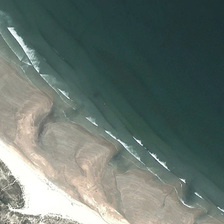

In [ ]:
# Example of a picture in the directory
file_path = os.path.join(dir_path, filenames[1500])
img = Image.open(file_path)
img

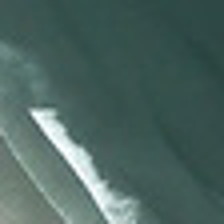

In [ ]:
# Delete Later

img = np.array(img)
img_new = img[:56, :56, :]
img_new = Image.fromarray(img_new)
img_new = img_new.resize(size = (224, 224))
img_new

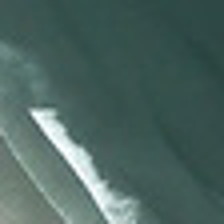

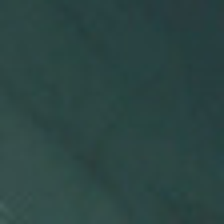

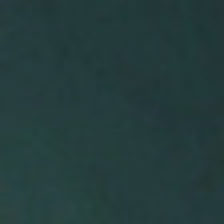

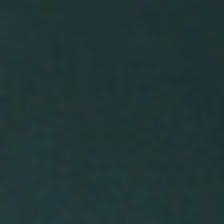

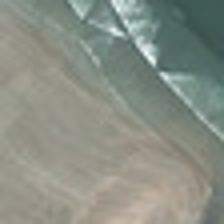

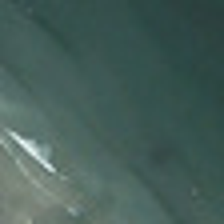

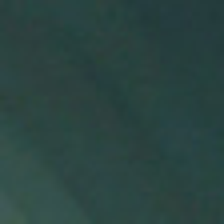

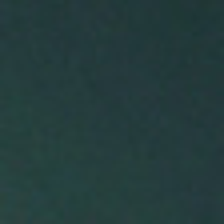

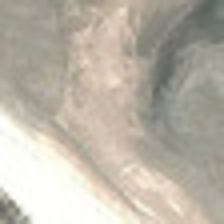

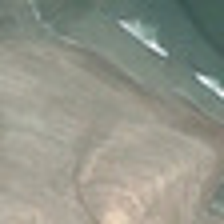

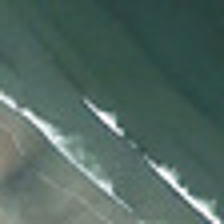

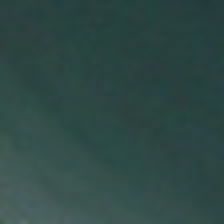

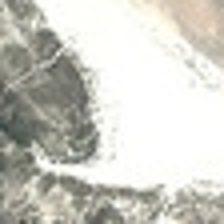

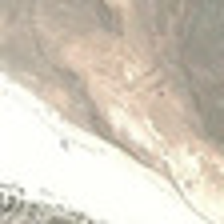

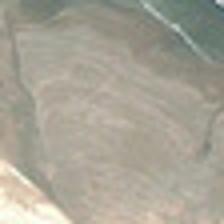

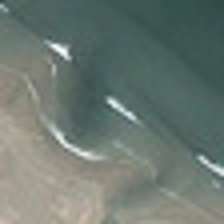

In [ ]:
# Delete Later

img_reshape = np.reshape(img, (4, 56, 4, 56, 3))

for i in  range(4):
  for j in range(4):
    new_image = img_reshape[i, :, j, :, :]
    # print(new_image.shape)
# img_new = Image.fromarray(img_reshape[:, 3, :, 1, :])
    img_new = Image.fromarray(new_image)
    img_new = img_new.resize(size = (224, 224))
    display(img_new)

In [ ]:
all_captions[1500]

'a piece of ocean is near a yellow beach .'

In [ ]:
# Total number of filenames. As the filenames are repeated for the captions,
# This basically shows the total number of captions in the data
num_images = len(filenames)
num_images

43680

In [ ]:
# Importing the pretrained VGG model
VGG_model = VGG16(include_top = True, weights = 'imagenet')

553467904/553467096 [==============================] - 3s 0us/step


In [ ]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# At first I will be training the model without changing the VGG model parameters
# Afterwords I will fine tune on these parameters to try to get a better result
VGG_model.trainable = False

In [ ]:
for layer in VGG_model.layers:
  print("{0}:    {1}".format(layer.trainable, layer.name))

False:    input_1
False:    block1_conv1
False:    block1_conv2
False:    block1_pool
False:    block2_conv1
False:    block2_conv2
False:    block2_pool
False:    block3_conv1
False:    block3_conv2
False:    block3_conv3
False:    block3_pool
False:    block4_conv1
False:    block4_conv2
False:    block4_conv3
False:    block4_pool
False:    block5_conv1
False:    block5_conv2
False:    block5_conv3
False:    block5_pool
False:    flatten
False:    fc1
False:    fc2
False:    predictions


In [ ]:
VGG_model_global = Model(inputs = VGG_model.input, outputs = VGG_model.get_layer('fc2').output)

In [ ]:
VGG_model_global.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# Stating a start and end marker to be added to each caption
start_marker = '<start> '
end_marker = ' <end>'

In [ ]:
# Adding the above markers to all captions
marked_captions = [start_marker + caption + end_marker for caption in all_captions]

In [ ]:
marked_captions[0:5]

['<start> many green trees and some buildings are in two sides of a railway station respectively . <end>',
 '<start> many green trees and some buildings are in two sides of a railway station respectively . <end>',
 '<start> many green trees and some buildings are in two sides of a railway station respectively . <end>',
 '<start> many green trees and some buildings are in two sides of a railway station respectively . <end>',
 '<start> many green trees and some buildings are in two sides of a railway station respectively . <end>']

In [ ]:
# The tokenizer will basically assign a token to the words used in the dataset
# < and > sign is excluded in filters
# num_words was 10000 for COCO, 2900 for RSICD, 320 for UCM data
tokenizer = Tokenizer(num_words = 2500, filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')

In [ ]:
tokenizer.fit_on_texts(marked_captions)

In [ ]:
# word_index shows the token assign to any word in the dataset
tokenizer.word_index['<end>']

2

In [ ]:
# Saving the tokens for start marker and end marker to be used later
end_token = tokenizer.word_index['<end>']
start_token = tokenizer.word_index['<start>']
start_token, end_token

(1, 2)

In [ ]:
# Creating a dictionary which maps from any index to word to later convert a token sequence to a sentence
values_list = list(tokenizer.word_index.values())
keys_list = list(tokenizer.word_index.keys())
print(len(keys_list))
index_to_word = {values_list[i] : keys_list[i] for i in range(len(keys_list))}
print(index_to_word[7])

2721
in


In [ ]:
# Converting all the captions in the dataset to a sequence of tokens
marked_tokens = tokenizer.texts_to_sequences(marked_captions)

In [ ]:
# seeing whether the limit on the tokens is properly set
max_list = []
for i, token in enumerate(marked_tokens):
  max_list.append(np.max(token))
print(np.max(max_list))

2499


In [ ]:
print(marked_captions[5])
print(marked_tokens[5])

<start> the twisty mud road is across the forest . <end>
[1, 8, 654, 1535, 24, 12, 175, 8, 64, 2]


In [ ]:
# This is the directory we will be working with to generate data to give to our model
# SHould change this if we want to give data from the validation set or any other directory
dir_path = "/content/RSICD_images"

In [ ]:
def load_image(img_files, as_batch = False, in_dir = True):
  '''
  This is a basic helper function to load images and slightly process it to give to the model.
  The output of this model can still be used to show its image directly using plt.imshow() provided that as_batch = False

  img_files can be a name of a single file or a list of files.

  as_batch will determine whether the output of this should be as a batch of images or as only its first element.
  (Usually as_batch = False only if the function is given a single image)

  in_dir will tell whether img_files is only the names of the files in the directory denoted by dir_path or its entire path is given.
  '''
  # Converting any img_files to be a list if it is not already
  if not type(img_files) is list:
    img_files = [img_files]
  batch_size = len(img_files)

  # Creating a batch of images from the img_files
  all_images = np.zeros((batch_size, 224, 224, 3))
  for i, img_file in enumerate(img_files):
    if in_dir:                                                          # Creating a proper path for files in dir_path
      img_file = os.path.join(dir_path, img_file)
    img = Image.open(img_file)
    img = img.resize(size = (224, 224))
    img = np.array(img) / 255
    if len(img.shape) == 2:                                             # Converting 2-D Grayscale images to 3-D arrays
      img = np.repeat(np.expand_dims(img, axis = 2), 3, axis = 2)
    all_images[i, :, :, :] = img

  # Sending the data as a batch if required. If not, only the first image is sent.
  if as_batch:
    return all_images
  else:
    return all_images[0, :, :, :]

## Data Generator

In [ ]:
def Data_generator(batch_size = 128):
  '''
  This is a genrator function that will generate the data in batches.
  The output is in a format such that it can be utilized by the model directly
  This generator function was needed because the dataset was very large and could not be fed to the model directly.
  So, this function will generate batches of data as it is required by the model
  '''
  while True:
    # Generating random files and its corresponding token sequences from the model
    indices = np.random.randint(num_images, size = batch_size)
    batch_files = []
    batch_tokens = []
    caption_lengths = []
    for i in indices:
      batch_files.append(filenames[i])
      batch_tokens.append(marked_tokens[i])
      caption_lengths.append(len(marked_tokens[i]))

    # Padding/truncating the captions to be exactly 20 words long
    max_tokens = np.max(caption_lengths)
    batch_tokens_padded = pad_sequences(batch_tokens, maxlen = max_tokens, padding = 'post', truncating = 'post')

    # Retrieving the image in the desired format from the load_image helper function
    image_input = load_image(batch_files, as_batch = True)

    # Generating input and output such that they are one time step shifted wrt each other.
    # This is required to train the lstm model created later
    decoder_input = batch_tokens_padded[:, 0:-1]
    decoder_output = batch_tokens_padded[:, 1:]
    input_data = {'input_1':image_input, 'decoder_input':decoder_input}
    output_data = {'transformer_1':decoder_output}
    yield (input_data, output_data)

In [ ]:
# Creating an object for the generator function with batch size 128
batch_size = 32
print(num_images)
generator = Data_generator(batch_size)

(input, output) = next(generator)

# I have made each epoch 5 times shorter for more checkpoints
# Also because each filename was used 5 times to use all captions so this should be a valid epoch wrt image files
steps_per_epoch = int(num_images/(batch_size*5))
print(steps_per_epoch)

43680
273


In [ ]:
input['decoder_input']

array([[  1, 339, 647, 302,   7,   8, 586,  11,  50,  78,  19,   2,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,  50,  12,   3, 147,  13, 186,  10,  24,   2,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,  14,   5,   9,   4,  16,   3,  21,  11,   5,  75,   2,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,   3,  49,  12,  25,   3,  23,  15,  14,   5,   9,   7,  17,
         30,  11,  26,   2,   0,   0,   0],
       [  1,   6, 204,  13,   4,   7,   3,  51,  39,  19,   2,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,  26,  12,   3,  28,  21,  11,  42,  47,   2,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,  31,   4,  14,   9,  20,   3,  56,  38,   2,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  1,  31,   4,   5, 189,  11, 112,  10, 331, 401, 260,  22, 168,
         58,   2,   0,   0,   0,   0,   0],
       [  1,  42,  48,  12,  16,   3,  21,  11,   5,  71,   2,  

## Transformer model construction starts here

In [ ]:
def positional_encoding(position, d_model):
  d_model = tf.cast(d_model, tf.float32)
  pos_matrix = tf.range(position)[:, tf.newaxis]
  pos_matrix = tf.cast(pos_matrix, tf.float32)
  d_model_matrix = tf.range(d_model)[tf.newaxis, :]
  angle = pos_matrix / K.pow(tf.cast(10000, tf.float32), (2 * d_model_matrix//2) / d_model)          # d_model is cast as float

  new_angle_1 = K.sin(angle[:, 0::2])
  new_angle_2 = K.cos(angle[:, 1::2])

  new_angle_1 = tf.expand_dims(new_angle_1, 2)
  new_angle_2 = tf.expand_dims(new_angle_2, 2)

  final_angle = tf.concat([new_angle_1, new_angle_2], 2)
  final_angle = tf.reshape(final_angle, (-1, d_model))

  pos_encoding = final_angle[tf.newaxis, :, :]
  return pos_encoding

In [ ]:
# TESTING

a = Input(shape = (None,))
pos_encoding = positional_encoding(tf.shape(a)[1], 512)
print(pos_encoding.shape)
print(pos_encoding)

(1, None, 512)
Tensor("strided_slice_4:0", shape=(1, None, 512), dtype=float32)


## Masking

In [ ]:
def create_padding_mask(seq):
  sequence = tf.cast(tf.math.equal(seq, 0), tf.float32)

  # Adding extra dimensions to porperly broadcast to required dimensions later
  return sequence[:, tf.newaxis, tf.newaxis, :]

In [ ]:
#TESTING

x = Input(shape = (None,))
x = tf.random.uniform((64, 20))
print(x.shape)
create_padding_mask(x).shape

(64, 20)


TensorShape([64, 1, 1, 20])

In [ ]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask[tf.newaxis, tf.newaxis, :, :]    # (seq_len, seq_len)

In [ ]:
# TESTING

a = Input(shape = (20, ), name = 'look_ahead_sample')
print(tf.shape(a)[1])
temp = create_look_ahead_mask(tf.shape(a)[1])
temp.shape
# a.shape

Tensor("strided_slice_5:0", shape=(), dtype=int32)


TensorShape([1, 1, None, None])

In [ ]:
def scaled_dot_product_attention(q, k, v, mask = None):

  matmul_qk = tf.matmul(q, k, transpose_b = True)     # (..., seq_len_q, seq_len_k)

  # Scaling matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_matmul_qk = matmul_qk / tf.math.sqrt(dk)

  # Adding mask
  if mask is not None:
    scaled_matmul_qk = scaled_matmul_qk + (mask * -1e9)

  # Softmax is applied on last axis (seq_len_k)
  attention_weights = tf.nn.softmax(scaled_matmul_qk, axis = -1)    # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)        # (..., seq_len_q, depth_v)
  return output

In [ ]:
# TESTING

temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)

# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
output = scaled_dot_product_attention(temp_q, temp_k, temp_v)
print(output.shape)
print(output)

(1, 2)
tf.Tensor([[1.000000e+01 9.276601e-25]], shape=(1, 2), dtype=float32)


In [ ]:
class MultiHeadAttention(Layer):
  def __init__(self, d_model, num_heads):
    super().__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    self.depth = d_model // num_heads

    self.wq = Dense(d_model)
    self.wk = Dense(d_model)
    self.wv = Dense(d_model)

    self.dense = Dense(d_model)

  def split_heads(self, x, batch_size):

    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm = [0, 2, 1, 3])

  def call(self, q, k, v, mask = None):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)       # (batch_size, seq_len, d_model)
    k = self.wk(k)       # (batch_size, seq_len, d_model)
    v = self.wv(v)       # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)           # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)           # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)           # (batch-size, num_heads, seq_len_v, depth)

    scaled_attention = scaled_dot_product_attention(q, k, v, mask)                # (batch_size, num_heads, seq_len_q, depth)
    scaled_attention = tf.transpose(scaled_attention, perm = [0, 2, 1, 3])        # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))            # (batch_size, seq_len_q, d_model)

    output  = self.dense(concat_attention)                                                     # (batch_size, seq_len_q, d_model)
    return output

In [ ]:
# TESTING

temp_mha = MultiHeadAttention(d_model = 512, num_heads = 8)
y = tf.random.uniform((1 ,60, 512))         # (batch_size, encoder_sequence, d_model)
out = temp_mha(y, y, y, None)
print(out.shape)

(1, 60, 512)


In [ ]:
def feed_forward_network(dff, d_model):
  return Sequential([Dense(dff, activation = 'relu'), Dense(d_model)])

In [ ]:
# TESTING

sample_ffn = feed_forward_network(2048, 512)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

In [ ]:
class EncoderLayer(Layer):
  def __init__(self, d_model, num_heads, dff, rate = 0.1):
    super().__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = feed_forward_network(dff, d_model)

    self.layernorm1 = LayerNormalization(epsilon = 1e-6)
    self.layernorm2 = LayerNormalization(epsilon = 1e-6)

    self.dropout1 = Dropout(rate)
    self.dropout2 = Dropout(rate)

  def call(self, x, traning = False):
    # Size of x is (batch_len, input_seq_len, d_model)

    attn_output = self.mha(x, x, x)                 # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output)
    out1 = self.layernorm1(attn_output)             # (batch_size, input_seq_len, d_model)

    ffn_output = self.ffn(out1)
    ffn_output = self.dropout2(ffn_output)
    out2 = self.layernorm2(ffn_output)              # (batch_size, input_seq_len, d_model)

    return out2


In [ ]:
# TESTING

sample_encoder = EncoderLayer(512, 8, 2048)
sample_output = sample_encoder(tf.random.uniform((64, 43, 512)))
sample_output.shape

TensorShape([64, 43, 512])

In [ ]:

class DecoderLayer(Layer):
  def __init__(self, d_model, num_heads, dff, rate = 0.1):
    super().__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = feed_forward_network(dff, d_model)

    self.layernorm1 = LayerNormalization(epsilon = 1e-6)
    self.layernorm2 = LayerNormalization(epsilon = 1e-6)
    self.layernorm3 = LayerNormalization(epsilon = 1e-6)

    self.dropout1 = Dropout(rate)
    self.dropout2 = Dropout(rate)
    self.dropout3 = Dropout(rate)

  def call(self, x, enc_output, look_ahead_mask = None, training = False):
    # enc_output.shape = (batch_size, input_seq_len, d_model)

    attn1 = self.mha1(x, x, x, look_ahead_mask)      # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training = training)
    out1 = self.layernorm1(x + attn1)

    # No mask in this as input is encoded image
    attn2 = self.mha2(out1, enc_output, enc_output)          # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training = training)
    out2 = self.layernorm2(out1 + attn2)

    ffn_output = self.ffn(out2)                              # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training = training)
    out3 = self.layernorm3(out2 + ffn_output)                # (batch_size, target_seq_len, d_model)

    return out3

In [ ]:
# TESTING

sample_decoder_layer = DecoderLayer(512, 8, 2048)
sample_decoder_layer_output = sample_decoder_layer(tf.random.uniform((64, 50, 512)), tf.random.uniform((64, 20, 512)), None, False)
print(sample_decoder_layer_output.shape)

(64, 50, 512)


## Transformer class

In [ ]:
class Transformer(Layer):
  def __init__(self, num_layers_encoder, num_layers_decoder, d_model, num_heads, dff, target_vocab_size, rate = 0.1, name = None):
    # Add maximum_position_encoding to the init arguments above if self.pos_encoding is used, i.e, slicing array is allowed
    super().__init__(name = name)

    self.d_model = d_model
    self.num_layers_decoder = num_layers_decoder
    self.num_layers_encoder = num_layers_encoder

    self.embedding = Embedding(target_vocab_size, d_model)          # I will be taking d_model = 512 and target_vocab_size = 10000/2900/320

    self.dropout_image = Dropout(rate)
    self.dropout_caption = Dropout(rate)

    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers_decoder)]

    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers_decoder)]

    self.final_layer = Dense(target_vocab_size, activation = 'softmax')

  def call(self, x, enc_output, look_ahead_mask = None, training = False):
    seq_len = tf.shape(x)[1]                                                   # Maybe tf.shape()[1]  or   x.shape[1] (This wont work for None shape)

    x = self.embedding(x)           # (batch_size, target_seq_len, d_model)
    x = x * K.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + positional_encoding(seq_len, self.d_model)                     # Can slice the self.pos_encoding too if Model allows it

    x = self.dropout_caption(x, training)
    enc_output = self.dropout_image(enc_output, training)

    for j in range(self.num_layers_encoder):
      enc_output = self.enc_layers[j](enc_output, training)

    for i in range(self.num_layers_decoder):
      x = self.dec_layers[i](x, enc_output, look_ahead_mask, training)

    output = self.final_layer(x)            # (batch_size, target_seq_len, target_vocab_size)

    return output

In [ ]:
# TESTING

sample_transformer = Transformer(6, 6, 512, 8, 2048, 10000, name = 'sample_transformer')

# temp_input = tf.random.uniform((64, 20), dtype = tf.int64, minval = 0, maxval = 200)
temp_input = Input((20,))
# temp_target = tf.random.uniform((64, 16, 512))
temp_target = Input((16, 512))

fn_out = sample_transformer(temp_input, temp_target)
print(fn_out.shape)

(None, 20, 10000)


In [ ]:
class ImageSequenceEncoder(Layer):
  def __init__(self, d_model):
    super().__init__()

    # self.dense1 = Dense(d_model, activation = 'relu')

    # self.repeatvector = RepeatVector(image_seq_len)

    self.dense_layers = [Dense(d_model, activation = 'relu') for i in range(49)]

    self.d_model = d_model
    # self.conv_layer = Conv2D(d_model, (3, 3), activation = 'relu')

  def call(self, input_image):
    batch_size = tf.shape(input_image)[0]

    # encoded_image = self.dense1(input_image)
    # repeat_encoded_image = self.repeatvector(encoded_image)

    # conv_image = self.conv_layer(input_image)
    # x = tf.transpose(conv_image, perm = [0, 3, 1, 2])
    # encoded_image = tf.reshape(x, (batch_size, self.d_model, 25))

    dense_results = []

    for i in range(7):
      for j in range(7):
        x = Lambda(lambda x: x[:, i, j, :], output_shape = (batch_size, self.d_model))(input_image)
        dense_value = self.dense_layers[7*i + j](x)[:, :, tf.newaxis]
        dense_results.append(dense_value)
    encoded_image = K.concatenate(dense_results, axis = -1)

    return encoded_image

In [ ]:
# TESTING

sample_image_encoder = ImageSequenceEncoder(512)
# input_image = tf.random.uniform((64, 7, 7, 512))
input_image = Input((7, 7, 512))
encoded_image = sample_image_encoder(input_image)
print(encoded_image.shape)

## Setting Hyperparameters

In [ ]:
# Setting hyperparameters
num_layers_encoder = 6
num_layers_decoder = 6
d_model = 512
dff = 2048
num_heads = 8
# image_seq_len = 20                       # Not required now after modifying ImageSequenceEncoder

target_vocab_size = 2500                   # 10000 for COCO, 2500 for RSICD, 320 for UCM
# max_seq_len = 50       # They are not used as input sequence length is now not known
# seq_len = 20           # Same as max_position_encoding
dropout_rate = 0.1

print("Bath size is: ", batch_size)

Bath size is:  32


In [ ]:
class CreateMask(Layer):
  def __init__(self):
    super().__init__()

  def call(self, caption):
    seq_len = tf.shape(caption)[1]                            # Maybe tf.shape()[1]
    look_ahead_mask = create_look_ahead_mask(seq_len)
    padding_mask = create_padding_mask(caption)
    combined_mask = tf.maximum(padding_mask, look_ahead_mask)
    return combined_mask
    # return [look_ahead_mask, padding_mask]

In [ ]:
# TESTING

temp_mask = CreateMask()
temp_caption = Input(shape = (None,))
combined_mask = temp_mask(temp_caption)
# print(combined_mask[0].shape, combined_mask[1].shape)
print(combined_mask.shape)

(None, 1, None, None)


In [ ]:
# Creating layer objects
image_encoder = ImageSequenceEncoder(d_model)
create_mask = CreateMask()
transformer = Transformer(num_layers_encoder, num_layers_decoder, d_model, num_heads, dff, target_vocab_size, dropout_rate, name = 'transformer_1')

# transfer_layer = VGG_model.get_layer('fc2')
transfer_layer = VGG_model.get_layer('block5_pool')
transfer_layer.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [ ]:
# Finally creating the model

image_input = VGG_model.input
decoder_input = Input(shape = (None,), name = 'decoder_input')

encoded_image = image_encoder(transfer_layer.output)
# print(decoder_input.shape)
mask = create_mask(decoder_input)
# print(mask[0].shape, mask[1].shape)
# print(mask.shape)

output = transformer(decoder_input, encoded_image, look_ahead_mask = mask, training = False)

final_model = Model(inputs = [image_input, decoder_input], outputs = [output])

In [ ]:
final_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
_______________________________________________________________________________________

In [ ]:
for layer in final_model.layers:
  print("{0}:\t\t{1}".format(layer.trainable, layer.name))

False:		input_1
False:		block1_conv1
False:		block1_conv2
False:		block1_pool
False:		block2_conv1
False:		block2_conv2
False:		block2_pool
False:		block3_conv1
False:		block3_conv2
False:		block3_conv3
False:		block3_pool
False:		block4_conv1
False:		block4_conv2
False:		block4_conv3
False:		block4_pool
False:		block5_conv1
False:		block5_conv2
False:		block5_conv3
True:		decoder_input
False:		block5_pool
True:		image_sequence_encoder
True:		create_mask_1
True:		transformer_1


In [ ]:
final_model.compile(optimizer = RMSprop(learning_rate = 0.000001), loss = 'sparse_categorical_crossentropy')

In [ ]:
# Creating all the callbacks to be used when training the model
# path_checkpoint = "drive/My Drive/Colab Notebooks/Project/Image Captioning/Callbacks_transformer/Checkpoint"
path_checkpoint = "/content/drive/My Drive/Colab Notebooks/Project/Image Captioning/Callbacks_Dataset/RSICD"
callback_checkpoint = ModelCheckpoint(filepath = path_checkpoint, verbose = 1, save_weights_only = True)

log_dir = "/content/drive/My Drive/Colab Notebooks/Project/Image Captioning/Callbacks_Dataset/Logs"
callback_tensorboard = TensorBoard(log_dir = log_dir, histogram_freq = 0, write_graph = False)

callbacks = [callback_checkpoint, callback_tensorboard]

In [ ]:
# Can load the data from here to use the model with weights from the last checkpoint
final_model.load_weights(path_checkpoint)

In [ ]:
final_model.fit(x = generator, steps_per_epoch = steps_per_epoch, epochs = 10, callbacks = callbacks)

Epoch 1/10


## Finding The Rouge Score

In [ ]:
file = open('drive/My Drive/Colab Notebooks/Project/Image Captioning/Dataset/annotations/captions_val2017.json')
raw_data_val = json.load(file)
file.close()

In [ ]:
records_val = {}
images_val = raw_data_val['images']
annotations_val = raw_data_val['annotations']

for image in images_val:
  records_val[image['id']] = {}
  records_val[image['id']]['filename'] = image['file_name']
  records_val[image['id']]['captions'] = []

for ann in annotations_val:
  records_val[ann['image_id']]['captions'].append(ann['caption'])

filenames_val = []
captions_val = []
for record in records_val.values():
  filenames_val.append(record['filename'])
  captions_val.append(record['captions'])

In [ ]:
# Downloading the train2017 file from the official coco website
# Put val2017.zip instead if you want to download validation set
file_path = '/content/val2017(packed)'
url = "http://images.cocodataset.org/zips/val2017.zip"
file_path, _ = urllib.request.urlretrieve(url = url, filename = file_path, reporthook = _print_download_progress)

- Download progress: 93.7%

In [ ]:
# Unpacking the file to get the data we need to work with
file_path = '/content/val2017(packed)'
zipfile.ZipFile(file=file_path, mode="r").extractall('/content/')

In [ ]:
# dir_path_val = "val2017"
# dir_path_val = "/content/RSICD_images"
dir_path_val = '/content/RSICD_images'

In [ ]:
# Just checking that all the file names are present

for i, name in enumerate(filenames_val):
  # Each filename will be joined to the dir_path to create a path for each image
  # This will then be used to open that file and work with it
  file_path = os.path.join(dir_path_val, name)
  img = Image.open(file_path)
  if i%500 == 0:
    print(i, end = ' ')
  if i%10000==0:
    print()

0 
500 1000 1500 2000 

In [ ]:
!pip install rouge-score

In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer = True)
# scorer.score(target, prediction)    but doesnt matter for fmeasure
# scores = scorer.score('The quick brown fox jumps over the lazy god', 'The quick brown dog jumps on the log')
scores = scorer.score('The quick brown dog jumps on the log', 'The quick brown fox jumps over the lazy god')
scores

{'rouge1': Score(precision=0.5555555555555556, recall=0.625, fmeasure=0.5882352941176471),
 'rouge2': Score(precision=0.25, recall=0.2857142857142857, fmeasure=0.26666666666666666),
 'rougeL': Score(precision=0.5555555555555556, recall=0.625, fmeasure=0.5882352941176471)}

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer = True)
all_scores = []

for i, filename in enumerate(filenames_val):                            # Can even do filenames_test for UCM dataset
  if i%100 == 0:
    print(i, end = ' ')
  if i%1000 == 0:
    print()

  captions_image = captions_val[i]                  # captions_image is a list of captions for each image(usually 5)

  img_path = os.path.join(dir_path_val, filename)
  image = load_image(img_path, as_batch = True, in_dir = False)

  # Depends on model from here
  decoder_input_data = np.array([[]])
  token_int = start_token
  output_text_max = ''
  count_tokens = 0
  while token_int != end_token and count_tokens<max_tokens:
    decoder_input_data = np.append(decoder_input_data, [[token_int]], axis = 1)
    # print(decoder_input_data)
    x_data = {
        'input_1' : image,
        'decoder_input' : decoder_input_data
    }
    decoder_output = final_model.predict(x_data)
    token_onehot = decoder_output[0, count_tokens, :]
    token_int = np.argmax(token_onehot)
    sampled_word = index_to_word[token_int]
    if token_int != end_token:
      output_text_max = output_text_max + ' ' + sampled_word
    count_tokens+=1
  # to here

  scores = []
  for caption in captions_image:
    score = scorer.score(caption, output_text_max)
    scores.append(score['rouge1'].fmeasure)
  all_scores.append(np.max(scores))

print()
final_score = np.mean(all_scores)
print(final_score)

0 
100 200 300 400 500 600 700 800 900 1000 
1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 
2100 
0.4901768212211461


For COCO Dataset :

Rouge 1 score is 0.5230997199745124

Rouge L score is 0.4862400731714099

For RSICD Dataset :

Rouge1 score is 0.6073917635589507

For UCM Dataset:

Rouge1 score is 0.6751161173474987(val set)

RougeL score is 0.6611173632096335 (val set)

For new ImageSequenceEncoder:

For RSICD Dataset using last CNN:

Rouge1 score is 0.4901768212211461

## Performance of the model on Images

In [ ]:
max_tokens = 20

In [ ]:
def create_caption(img_path, in_dir = True, plot_image = True, beam_width = 3):
  # Input of this function can also a list of paths
  # final_model expects entire batch as input. So, is_batch = True will give a 4-D array with len(image_path) image as output
  # This is designed for only 1 input img_path as input_1 will become many image while there is only 1 new_sequence
  # If you want to make it for multiple images too then wrap the beam search in for loop over all images and change the value of image in inputs
  # Also dont forget to make changes for plotting image
  image = load_image(img_path, as_batch = True, in_dir = in_dir)

  count = 1
  base_sequence = [0]*max_tokens
  previous_score_choices = [0]
  # There should be no reptition, i.e, every choice of previous_sequence_choices should be different
  previous_sequence_choices = [[start_token]]


  if plot_image:
    plt.imshow(image[0, :, :, :])
    plt.show()



  # while count<20:
  #   current_score_choices = []
  #   current_sequence_choices = []

  #   for i in range(len(previous_sequence_choices)):
  #     if previous_sequence_choices[i][-1] == end_token:
  #       current_score_choices.append(previous_score_choices[i])
  #       current_sequence_choices.append(previous_sequence_choices[i])
  #     else:
  #       new_sequence = np.zeros((1, max_tokens))
  #       new_sequence[0, :] = base_sequence[:]
  #       new_sequence[0, 0:len(previous_sequence_choices[i])] = previous_sequence_choices[i][:]
  #       inputs = {
  #           'input_1' : image,
  #           'decoder_input' : new_sequence
  #       }
  #       decoder_output = final_model.predict(inputs)
  #       token_onehot = decoder_output[0, len(previous_sequence_choices[i]) - 1, :]
  #       for j in range(beam_width):
  #         max_token = np.argmax(token_onehot)
  #         max_value = np.max(token_onehot)
  #         token_onehot[max_token] = -100
  #         current_sequence_choices.append(previous_sequence_choices[i] + [max_token])
  #         new_score = (previous_score_choices[i]*(count**0.7) + np.log(max_value))/((count+1)**0.7)
  #         current_score_choices.append(new_score)

  #   previous_score_choices = []
  #   previous_sequence_choices = []
  #   for _ in range(beam_width):
  #     previous_score_choices.append(np.max(current_score_choices))
  #     previous_sequence_choices.append(current_sequence_choices[np.argmax(current_score_choices)])

  #   count+=1
  # final_sequence = previous_sequence_choices[np.argmax(previous_score_choices)]

  # output_text_beam = ''
  # for i in final_sequence:
  #   output_text_beam = output_text_beam + index_to_word[i] + ' '

  # print("This is the output of beam_width:\n", output_text_beam)

  '''
  This is how he does it
  '''

  # shape = (1, max_tokens)
  decoder_input_data = np.array([[]])
  token_int = start_token
  output_text_max = ''
  count_tokens = 0
  while token_int != end_token and count_tokens<max_tokens:
    decoder_input_data = np.append(decoder_input_data, [[token_int]], axis = 1)
    # print(decoder_input_data)
    x_data = {
        'input_1' : image,
        'decoder_input' : decoder_input_data
    }
    decoder_output = final_model.predict(x_data)
    # return decoder_output
    # exit
    # print(decoder_output.shape)
    token_onehot = decoder_output[0, count_tokens, :]
    token_int = np.argmax(token_onehot)
    # print(token_int)
    sampled_word = index_to_word[token_int]
    output_text_max = output_text_max + ' ' + sampled_word
    count_tokens+=1

  print("This is the output of greedy search:\n", output_text_max)

## Result of UCM Dataset


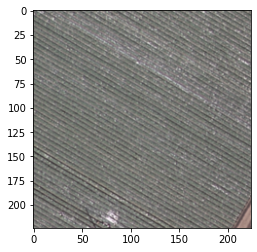

This is the output of greedy search:
  it is a piece of farmland <end>
It is a piece of farmland .


In [ ]:
create_caption(filenames[7])
print(all_captions[7])

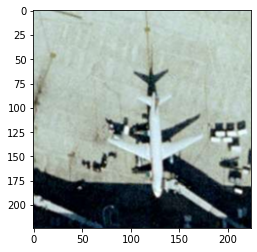

This is the output of greedy search:
  an airplane is surrounded with some cars in the airport <end>
An airplane is surrounded with some cars .


In [ ]:
create_caption(filenames[425])
print(all_captions[425])

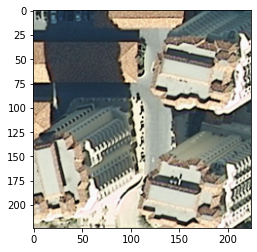

This is the output of greedy search:
  there are some buildings with grey roofs <end>
Some buildings with orange roofs are crowded .


In [ ]:
create_caption(filenames[1798])
print(all_captions[1798])

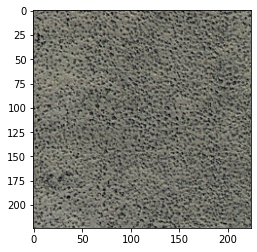

This is the output of greedy search:
  lots of plants scattered in the loess ground <end>
There are some grey plants scattered on the ground .


In [ ]:
create_caption(filenames[2323])
print(all_captions[2323])

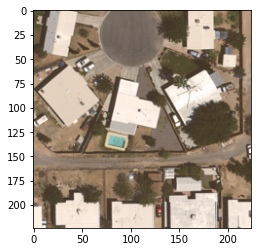

This is the output of greedy search:
  a medium residential area with houses and trees <end>
A medium residential area with a narrow road goes through this area .


In [ ]:
create_caption(filenames[5072])
print(all_captions[5072])

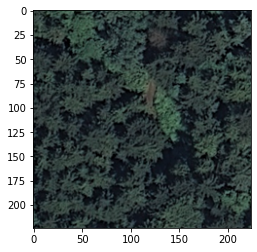

This is the output of greedy search:
  lots of dark green trees constitute a dense forest <end>
['This is a dense forest with lots of plants .', 'This is a dense forest with green plants and dotted with some dark green trees .', 'There are lots of green plants and dotted with some dark green plants .', 'Lots of green plants dotted with some dark green plants in the forest .', 'Lots of green plants in the dense forest .']


In [ ]:
create_caption(filenames_val[75])
print(captions_val[75])

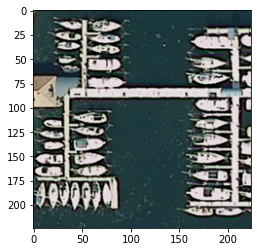

This is the output of greedy search:
  many boats docked neatly at the harbor and some positions are free <end>
['Lots of boats with different size docked at the harbor .', 'Lots of boats docked neatly at the harbor .', 'Many boats docked neatly at the harbor and the water is deep blue .', 'Many boats with different size docked neatly at the harbor .', 'Lots of boats with different size docked neatly at the harbor .']


In [ ]:
create_caption(filenames_val[107])
print(captions_val[107])

119


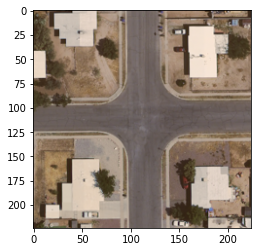

This is the output of greedy search:
  an intersection with some houses and plants at the corners <end>
['An intersection with no cars or pedestrians .', 'An intersection with four houses at each corner .', 'A desolate intersection only with four houses at each corner .', 'A desolate intersection with no cars or pedestrians .', 'An intersection with two roads vertical to each other .']


In [ ]:
# num = np.random.randint(num_images)
num = np.random.randint(len(filenames_val))
print(num)
# create_caption(filenames[num])
# print(all_captions[num])
create_caption(filenames_val[num])
print(captions_val[num])

## Result of RSICD Dataset

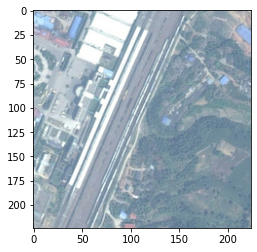

This is the output of greedy search:
  greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening
many green trees and some buildings are in two sides of a railway station respectively .


In [ ]:
create_caption(filenames[3])
print(all_captions[3])

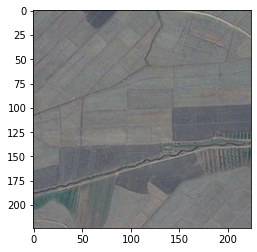

This is the output of greedy search:
  greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening greening
many pieces of farmlands are together .


In [ ]:
create_caption(filenames[1013])
print(all_captions[1013])

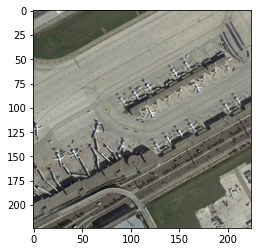

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
the airport packed in all direction,in good order .


In [ ]:
create_caption(filenames[1511])
print(all_captions[1511])

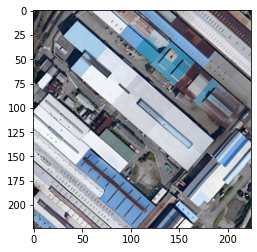

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
a road was built around the factory .


In [ ]:
create_caption(filenames[13192])
print(all_captions[13192])

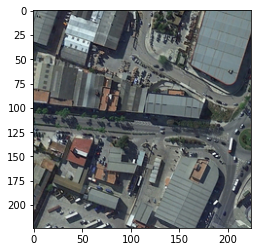

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
the industrial houses in the street are neatly arranged .


In [ ]:
create_caption(filenames[10119])
print(all_captions[10119])

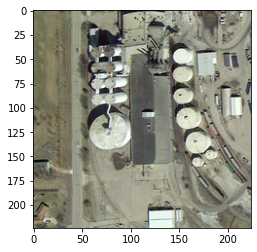

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
there are some truck parking near the storage tanks .


In [ ]:
create_caption(filenames[15192])
print(all_captions[15192])

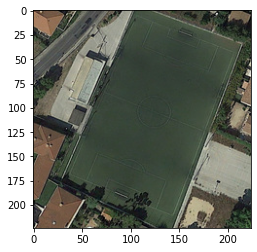

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
some buildings and green trees are around a football field .


In [ ]:
create_caption(filenames[25722])
print(all_captions[25722])

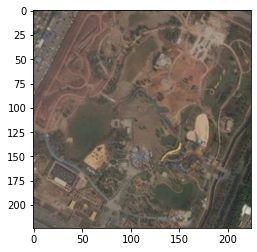

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
this vast area is a large park .


In [ ]:
create_caption(filenames[38914])
print(all_captions[38914])

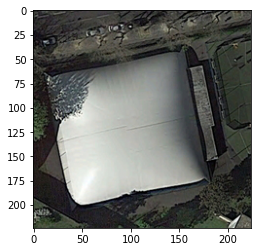

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
some green trees are around a square white center building .


In [ ]:
create_caption(filenames[4386])
print(all_captions[4386])

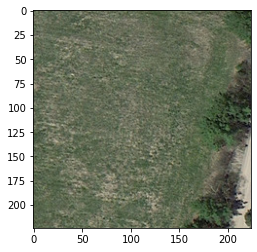

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
next to the road was a large area of pasture .


In [ ]:
create_caption(filenames[36781])
print(all_captions[36781])

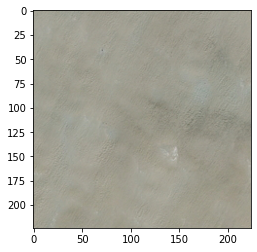

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
['a piece of sand in the desert is like fish scale .', 'a piece of desert is dusty ,barren and desolate .', 'it is a piece of gray yellow desert .', 'it is a piece of gray yellow desert .', 'a piece of sand in the desert is like fish scale .']


In [ ]:
create_caption(filenames_val[57])
print(captions_val[57])

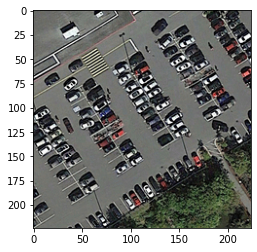

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
['a lot of cars parked in the parking lot .', 'some trees were planted around the parking lot .', 'some trees were planted around the parking lot .', 'a lot of cars parked in the parking lot .', 'a lot of cars parked in the parking lot .']


In [ ]:
create_caption(filenames_val[1011])
print(captions_val[1011])

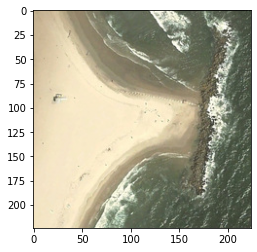

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
['a yellow beach is near an ocean with some white waves .', 'a yellow beach is near an ocean with some white waves .', 'a yellow beach is near an ocean with some white waves .', 'a yellow beach is near an ocean with some white waves .', 'a yellow beach is near an ocean with some white waves .']


In [ ]:
create_caption(filenames_val[1399])
print(captions_val[1399])

1223


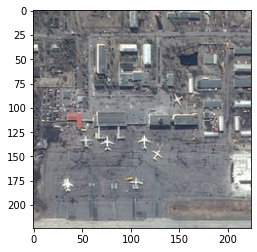

This is the output of greedy search:
  many buildings and green trees are in a dense residential area <end>
['some planes are parked near near some buildings and green trees .', 'there are some buildings in the vicinity of the airport .', 'there are some buildings in the vicinity of the airport .', 'some planes are parked near near some buildings and green trees .', 'some planes are parked near near some buildings and green trees .']


In [ ]:
# num = np.random.randint(num_images)
num = np.random.randint(len(filenames_val))
print(num)
# create_caption(filenames[num])
# print(all_captions[num])
create_caption(filenames_val[num])
print(captions_val[num])

## Result of COCO Dataset

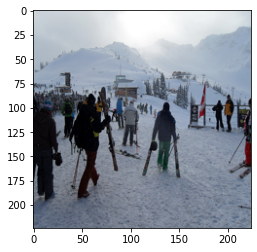

This is the output of greedy search:
  a group of people on a snowy slope <end>


In [ ]:
create_caption(filenames[101090], beam_width = 3)

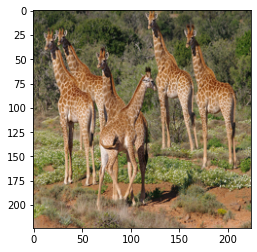

This is the output of greedy search:
  two giraffes are standing in the grass near a tree <end>


In [ ]:
create_caption(filenames[131090], beam_width = 3)

In [ ]:
marked_captions[131090]

'<start> A herd of giraffe standing next to each other near a forested hillside. <end>'

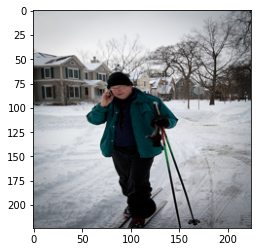

This is the output of greedy search:
  a man standing on a snow covered slope <end>


In [ ]:
create_caption(filenames[101050], beam_width = 3)

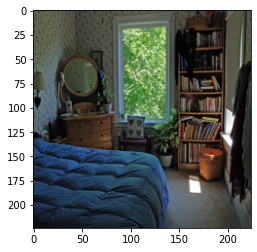

This is the output of greedy search:
  a living room with a couch and a television <end>


In [ ]:
file_path = "val2017/000000000632.jpg"
create_caption(file_path, beam_width = 3, in_dir = False)

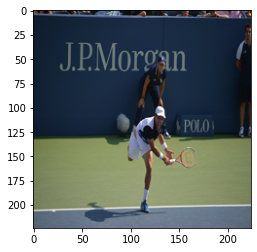

This is the output of greedy search:
  a man is playing tennis on a court <end>


In [ ]:
file_path = "val2017/000000000885.jpg"
create_caption(file_path, beam_width = 3, in_dir = False)

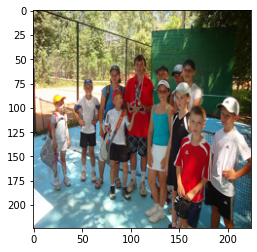

This is the output of greedy search:
  a group of people standing around a table with a large cake <end>


In [ ]:
file_path = "val2017/000000001000.jpg"
create_caption(file_path, beam_width = 3, in_dir = False)

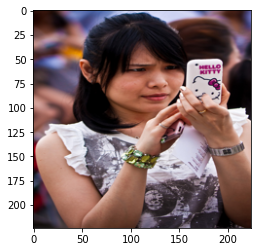

This is the output of greedy search:
  a woman holding a hot dog in her hand <end>


In [ ]:
file_path = "val2017/000000001296.jpg"
create_caption(file_path, beam_width = 3, in_dir = False)

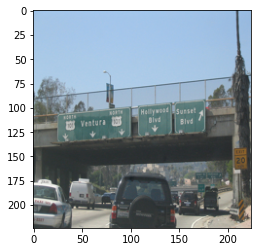

This is the output of greedy search:
  a street sign that is on a pole <end>


In [ ]:
file_path = "val2017/000000001532.jpg"
create_caption(file_path, beam_width = 3, in_dir = False)

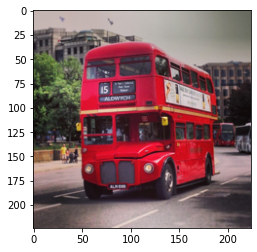

This is the output of greedy search:
  a red double decker bus is driving down the street <end>


In [ ]:
file_path = "val2017/000000001584.jpg"
create_caption(file_path, beam_width = 3, in_dir = False)

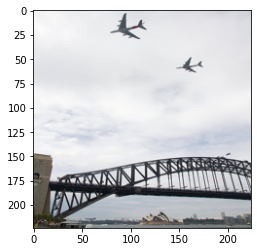

This is the output of greedy search:
  a plane flying over a body of water <end>


In [ ]:
file_path = "val2017/000000001761.jpg"
create_caption(file_path, beam_width = 3, in_dir = False)